In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/zomato.csv', encoding='latin1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,"9,551.00","9,551.00","9,551.00","9,551.00","9,551.00","9,551.00","9,551.00","9,551.00"
mean,"9,051,128.35",18.37,64.13,25.85,"1,199.21",1.80,2.67,156.91
std,"8,791,521.28",56.75,41.47,11.01,"16,121.18",0.91,1.52,430.17
min,53.00,1.00,-157.95,-41.33,0.00,1.00,0.00,0.00
25%,"301,962.50",1.00,77.08,28.48,250.00,1.00,2.50,5.00
50%,"6,004,089.00",1.00,77.19,28.57,400.00,2.00,3.20,31.00
75%,"18,352,291.50",1.00,77.28,28.64,700.00,2.00,3.70,131.00
max,"18,500,652.00",216.00,174.83,55.98,"800,000.00",4.00,4.90,"10,934.00"


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns = df.columns.str.lower()

In [7]:
cc=pd.read_excel('/content/Country-Code.xlsx')

In [8]:
cc.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [9]:
df['country'] = df['country code'].map(cc.set_index('Country Code')['Country'])

In [10]:
df.sample(5)

,restaurant id,restaurant name,country code,city,address,locality,locality verbose,longitude,latitude,cuisines,...,has table booking,has online delivery,is delivering now,switch to order menu,price range,aggregate rating,rating color,rating text,votes,country
1509,308477,Kabab Roll Cafe,1,Gurgaon,"Metropark Food Court, HUDA City Centre Metro S...","Huda City Centre Metro Station, Sector 29, Gur...","Huda City Centre Metro Station, Sector 29, Gur...",77.07,28.46,"North Indian, Mughlai",...,No,Yes,No,No,2,3.80,Yellow,Good,121,India
7093,302425,Annapoorna,1,New Delhi,"Loni Road, Near Red Light, Shahdara, New Delhi",Shahdara,"Shahdara, New Delhi",77.29,28.69,Street Food,...,No,No,No,No,1,3.10,Orange,Average,19,India
8445,300180,LIT Ultrabar,1,Noida,"B-1, 9/10, Near Sector 18 Metro Station, Secto...",Sector 18,"Sector 18, Noida",77.33,28.57,"Continental, American, North Indian, Chinese",...,Yes,No,No,No,3,3.60,Yellow,Good,425,India
5154,18233599,The Chocolate Room,1,New Delhi,"B-6, Ground Floor, Shivalik, Malviya Nagar, Ne...",Malviya Nagar,"Malviya Nagar, New Delhi",77.21,28.53,"Cafe, Italian, Mexican, Salad, Desserts",...,Yes,Yes,No,No,2,3.40,Orange,Average,155,India
8975,18418250,Zooby's Kitchen,1,Noida,"Shop 31, Amrapali Princely Estate, Sector 76, ...",Sector 72,"Sector 72, Noida",77.38,28.57,"North Indian, Mughlai, Chinese",...,Yes,No,No,No,2,3.50,Yellow,Good,31,India


In [11]:
country_counts = df['country'].value_counts(ascending=False).reset_index()
country_counts.columns = ['country', 'count']

fig = px.bar(country_counts, x='country', y='count', title='Number of Reviews by Country',log_y=True)
fig.show()


###As seen from the graph above the highest 3 countries are India,USA, and UK respectively

In [12]:
def city(df, country):
    city_counts = (
        df[df['country'] == country]['city']
        .value_counts(ascending=False)
        .reset_index()
    )
    city_counts.columns = ['city', 'count']

    fig = px.histogram(city_counts, x='city', y='count',
                       title=f'Number of Cities in {country}', log_y=True)
    fig.show()


In [13]:
city(df,'India')

### It seems like New Delhi has the highest resturant counts in india

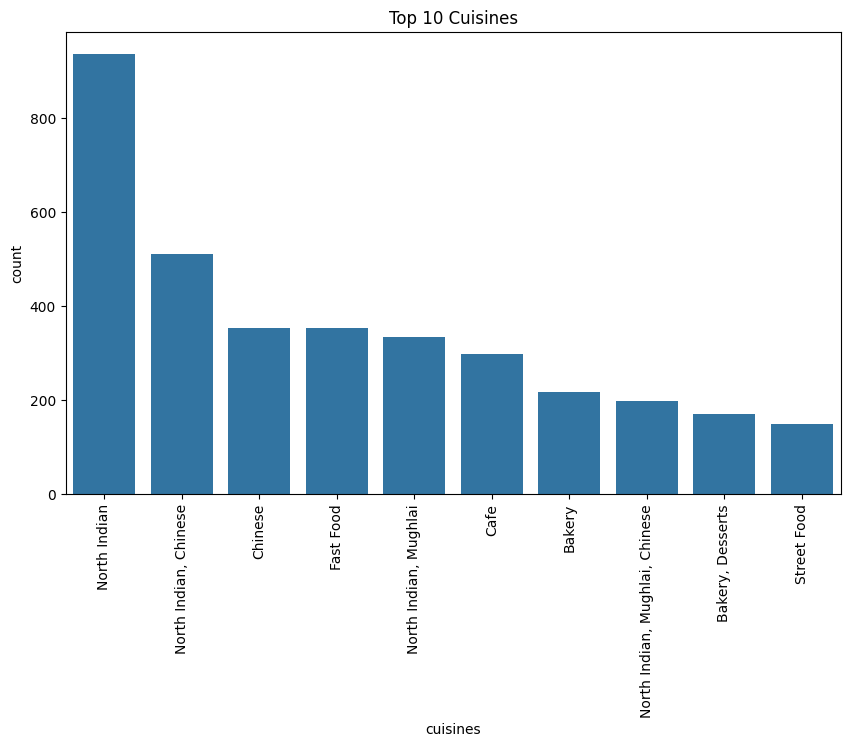

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(df['cuisines'].value_counts(ascending = False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Cuisines')
plt.show()

### it seems like north indian, north indian/chinese and chinese are the most popular cuisines globally

In [15]:
df_cuisines =( df.groupby('cuisines')['aggregate rating'].mean().sort_values(ascending=False).head(20).reset_index())

fig = px.bar ( df_cuisines, x='cuisines', y='aggregate rating', title='Top 10 Cuisines by Aggregate Rating')
fig.show()

From graph above you can conclude that 18 cuisines got 4.9/5 and that is the highst rating <br>
but this depends only on the aggregate rating without taking number of votes into consideration <br>
so The IMDb Weighted Rating Formula is the solution <br>
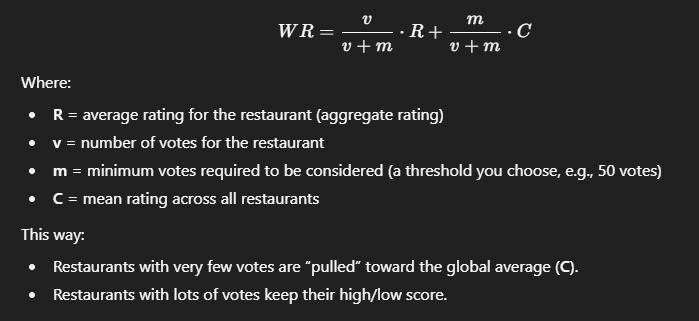

In [16]:
C = df['aggregate rating'].mean()
m = df['votes'].quantile(0.90)  # e.g., 90th percentile as cutoff

In [17]:
def weighted_rating(x, m=m, C=C):
    v = x['votes']
    R = x['aggregate rating']
    return (v/(v+m) * R) + (m/(v+m) * C)

df['weighted_rating'] = df.apply(weighted_rating, axis=1)

top_restaurants = df.sort_values('weighted_rating', ascending=False).head(10)

fig = px.bar ( top_restaurants, x='cuisines', y='aggregate rating', title='Top 10 Cuisines by Modified Aggregate Rating')
fig.show()

you see now the change of result
there are more techniques you can use to do it
for example <br>
Weighted score

In [18]:
df['weighted_rating'] = df['aggregate rating'] * np.log1p(df['votes'])
fig = px.bar ( top_restaurants, x='cuisines', y='weighted_rating', title='Top 10 Cuisines by Modified Aggregate Rating')
fig.show()

it gives almost the same oreder so we can say that north indian/chinese has the highest rating

In [28]:
df_filtered = df[df['cuisines'] == 'North Indian, Chinese']
cuisine_counts = df_filtered.groupby("country").size().reset_index(name="count")
fig = px.choropleth(
    cuisine_counts,
    locations="country",
    locationmode="country names",
    color="count",
    hover_name="country",
    title="Number of 'North Indian, Chinese' Restaurants per Country"
)
fig.show()

there are 511 restaurants just in india with the North Indian, Chinese cuisine

### the relationship between cost and rating

In [32]:
fig = px.scatter(df, x='average cost for two', y='aggregate rating',
                 size='votes', hover_data=['restaurant name', 'city', 'cuisines'],
                 title='Cost for Two vs. Aggregate Rating (Bubble Size = Votes)',
                 labels={'average cost for two': 'Approx Cost for Two  in (₹)'})
fig.show()

## Is having Online Delivery affects Ratings?

In [35]:
fig = px.box(df, x='has online delivery', y='aggregate rating',
             title='Distribution of Ratings: Online Delivery vs. No Delivery')
fig.show()

In [36]:
avg_cost_by_country = df.groupby('country')['average cost for two'].mean().reset_index()
avg_cost_by_country = avg_cost_by_country.sort_values('average cost for two', ascending=False)

fig = px.bar(avg_cost_by_country.head(10), x='country', y='average cost for two',
             title='Average Cost for Two in Top 10 Countries',
             color='average cost for two', color_continuous_scale='Viridis')
fig.show()

In [49]:
online_delivery = df.groupby('country')['has online delivery'].value_counts(normalize=True).unstack().reset_index().sort_values('Yes', ascending=False)

fig = px.bar(online_delivery, x='country', y='Yes',
             title='Percentage of Restaurants Offering Online Delivery by Country')
fig.show()

Text(0.5, 1.0, 'Correlation Heatmap')

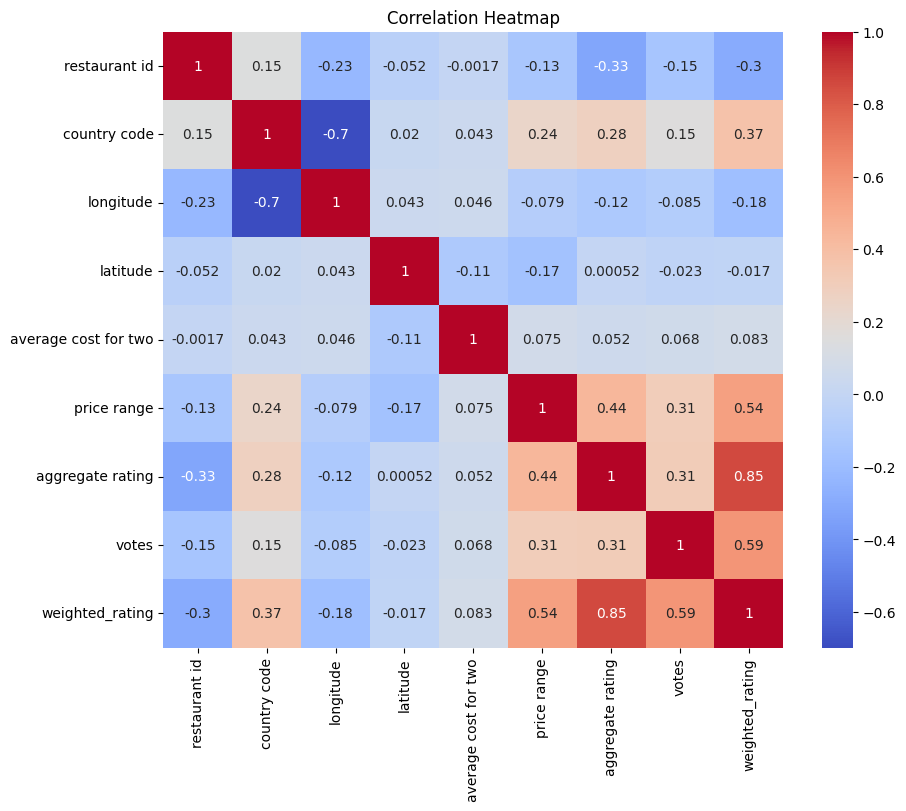

In [53]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [54]:
avg_rating_by_country = df.groupby('country')['aggregate rating'].mean().reset_index()
avg_rating_by_country = avg_rating_by_country.sort_values('aggregate rating', ascending=False)

fig = px.bar(avg_rating_by_country.head(15), x='country', y='aggregate rating',
             title='Top 15 Countries by Average Restaurant Rating',
             color='aggregate rating', color_continuous_scale='Viridis')
fig.show()

In [55]:
votes_by_delivery = df.groupby('has online delivery')['votes'].mean().reset_index()
fig = px.bar(votes_by_delivery, x='has online delivery', y='votes',
             title='Average Votes by Online Delivery Availability')
fig.show()

In [56]:
votes_by_booking = df.groupby('has table booking')['votes'].mean().reset_index()
fig = px.bar(votes_by_booking, x='has table booking', y='votes',
             title='Average Votes by Table Booking Availability')
fig.show()

In [58]:
fig = px.scatter(df, x='votes', y='aggregate rating',title='Relationship Between Number of Votes and Rating')
fig.show()


#Key Insights
Best Markets: India, US, UK — focus on big cities like New Delhi, Gurgaon, Noida.

Popular Foods: North Indian/Chinese, American, Italian.

Price & Rating: Higher-priced restaurants usually get better ratings.

Customer Likes: Restaurants with table booking and delivery get more votes and higher ratings.
